In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #导入seanborn包
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(5,4))
data=pd.read_csv(r'data.csv')
data.head()

,身高,体重,开设,课程,学号
0,195,109,有必要,概率统计,0
1,178,119,无必要,统计方法,1
2,156,122,有必要,编程技术,2
3,185,147,无必要,都学习过,3
4,179,130,有必要,都未学过,4


<Figure size 360x288 with 0 Axes>

In [22]:
i=np.random.randint(0,15,6) #抽取6名学生
i

array([ 0, 14, 14,  0,  6,  7])

In [23]:
data.iloc[i]

,身高,体重,开设,课程,学号
0,195,109,有必要,概率统计,0
14,167,120,有必要,都未学过,14
14,167,120,有必要,都未学过,14
0,195,109,有必要,概率统计,0
6,168,149,有必要,统计方法,6
7,156,138,无必要,编程技术,7


In [24]:
data.sample(6) #直接抽取6名学生信息（随机）

,身高,体重,开设,课程,学号
4,179,130,有必要,都未学过,4
8,173,129,有必要,都学习过,8
9,178,102,无必要,都未学过,9
0,195,109,有必要,概率统计,0
5,163,134,无必要,概率统计,5
3,185,147,无必要,都学习过,3


    count      mean       std       min      25%       50%       75%       max
0  1000.0  0.008328  0.305297 -0.865337 -0.18953  0.005247  0.199705  0.927596


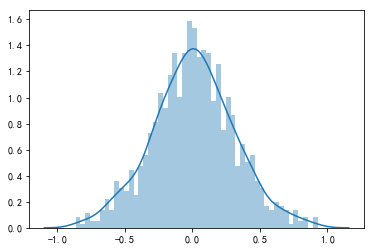

In [27]:
def norm_sim1(N=1000,n=10): #n为样本个数，N为模拟次数（即抽样次数）
    xbar=np.zeros(N) #模拟样本均值
    for i in range(N): #在[0,1]上的标准正态随机数及均值
        xbar[i]=np.random.normal(0,1,n).mean()
    sns.distplot(xbar,bins=50) #plt.hist(xbar,bins=50)
    print(pd.DataFrame(xbar).describe().T)
norm_sim1()

# 非正态均值统计量的分布--渐近正态分布

    count      mean       std       min       25%      50%       75%       max
0  1000.0  0.503326  0.092676  0.211479  0.441212  0.50194  0.566019  0.783012


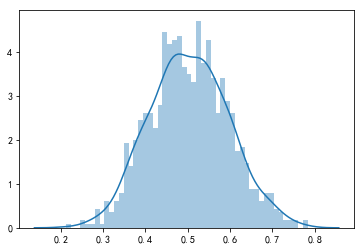

In [30]:
def norm_sim2(N=1000,n=10):
    xbar=np.zeros(N)
    for i in range(N): 
        xbar[i]=np.random.uniform(0,1,n).mean() #[0,1]上的随机数及均值
    sns.distplot(xbar,bins=50)
    print(pd.DataFrame(xbar).describe().T)
norm_sim2()

# 模拟均值的T分布

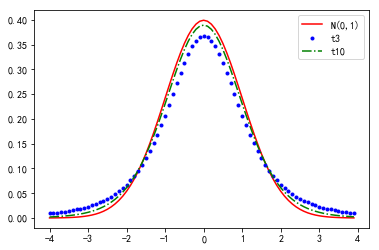

In [31]:
import scipy.stats as st
x=np.arange(-4,4,0.1)
yn=st.norm.pdf(x,0,1)
yt3=st.t.pdf(x,3)
yt10=st.t.pdf(x,10)
plt.plot(x,yn,'r-',x,yt3,'b.',x,yt10,'g-.')
plt.legend(['N(0,1)','t3','t10'])

# Python实现简单的参数估计和假设检验方法

### 点估计

In [33]:
data['身高'].mean() #均值的点估计

174.75

In [34]:
data['身高'].std() #标准差的点估计

11.316654393709594

In [35]:
# 比例的点估计
f=data['开设'].value_counts()
p=f/sum(f)
p

无必要    0.5
有必要    0.5
Name: 开设, dtype: float64

### 区间估计

In [38]:
x=np.array([10.1,10,9.8,10.5,9.7,10.1,9.9,10.2,10.3,9.9])
mean=x.mean()
std=x.std()
interval=st.t.interval(0.95,len(x)-1,mean,std)  #置信水平，自由度，样本均值，样本标准差
interval

(9.531674678392644, 10.568325321607357)

In [41]:
#计算身高总体均值的置信区间，置信水平为0.95
mean1=data['身高'].mean()
std1=data['身高'].std()
df1=len(data['身高'])-1 #计算自由度
st.t.interval(0.95,df1,mean1,std1) #计算置信区间

(150.62912213527576, 198.87087786472424)

# 参数的假设检验

### 由于学生身高数据服从正态分布，下面比较这组学生的身高与全国大学生平均身高（均值为 166 或 170）有无显著性差异？

In [52]:
st.ttest_1samp(data['身高'],popmean=166)#进行单样本t检验,检验结果显示pvalue小于0.05，故在显著性水平0.05时，差异明显，拒绝原假设H0

Ttest_1sampResult(statistic=3.092786859290753, pvalue=0.0074258303229441285)

In [55]:
st.ttest_1samp(data['身高'],popmean=170) #不拒绝原假设

Ttest_1sampResult(statistic=1.6789414379006946, pvalue=0.1138676345290142)

### T分布进行均值检验的示意图

  单样本t检验	 t= 1.679 p=0.1139
 t置信区间： (150.62912213527576, 198.87087786472424)


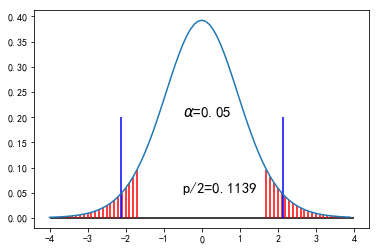

In [54]:
def ttest_1plot(X,mu=0): #单样本均值t检验图
    k=0.1
    df=len(X)-1
    t1p=st.ttest_1samp(X,popmean=mu)
    x=np.arange(-4,4,k)
    y=st.t.pdf(x,df)
    t=abs(t1p[0])
    p=t1p[1]
    x1=x[x<=-t]
    y1=y[x<=-t]
    x2=x[x>=t]
    y2=y[x>=t]
    print('  单样本t检验\t t=%6.3f p=%6.4f' %(t,p))
    print(' t置信区间：',st.t.interval(0.95,len(X)-1,X.mean(),X.std()))
    plt.plot(x,y)
    plt.hlines(0,-4,4)  #y,x_min,x_max
    plt.vlines(x1,0,y1,colors='r') #x,y_min,y_max
    plt.vlines(x2,0,y2,colors='r')
    plt.text(-0.5,0.05,"p/2=%6.4f" %t1p[1],fontsize=15)
    plt.vlines(st.t.ppf(0.05/2,df),0,0.2,colors='b')
    plt.vlines(-st.t.ppf(0.05/2,df),0,0.2,colors='b')
    plt.text(-0.5,0.2,r"$\alpha$=%3.2f"%0.05,fontsize=15)
ttest_1plot(data['身高'],170)